<a href="https://colab.research.google.com/github/mehdiabbasidev/darsman-machine-learning/blob/main/Plot_Column_Distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [3]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## تابع محاسبه و رسم میزان چولگی برای تمامی ویژگیهای یک دیتاست

In [6]:
def plot_column_distributions(df):
    n_cols = 3
    n_rows = (len(df.columns) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))

    for i, column in enumerate(df.columns):
        row, col = divmod(i, n_cols)
        ax = axes[row, col]

        if pd.api.types.is_numeric_dtype(df[column]):
            sns.histplot(x=df[column], ax=ax)
            print(f'Skewness of {column}: {skew(df[column])}')
        else:
            sns.countplot(x=df[column], ax=ax)

        ax.set_title(column)

    for i in range(len(df.columns), n_rows * n_cols):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()

Skewness of sepal length (cm): 0.3117530585022963
Skewness of sepal width (cm): 0.31576710633893473
Skewness of petal length (cm): -0.2721276664567214
Skewness of petal width (cm): -0.10193420656560036


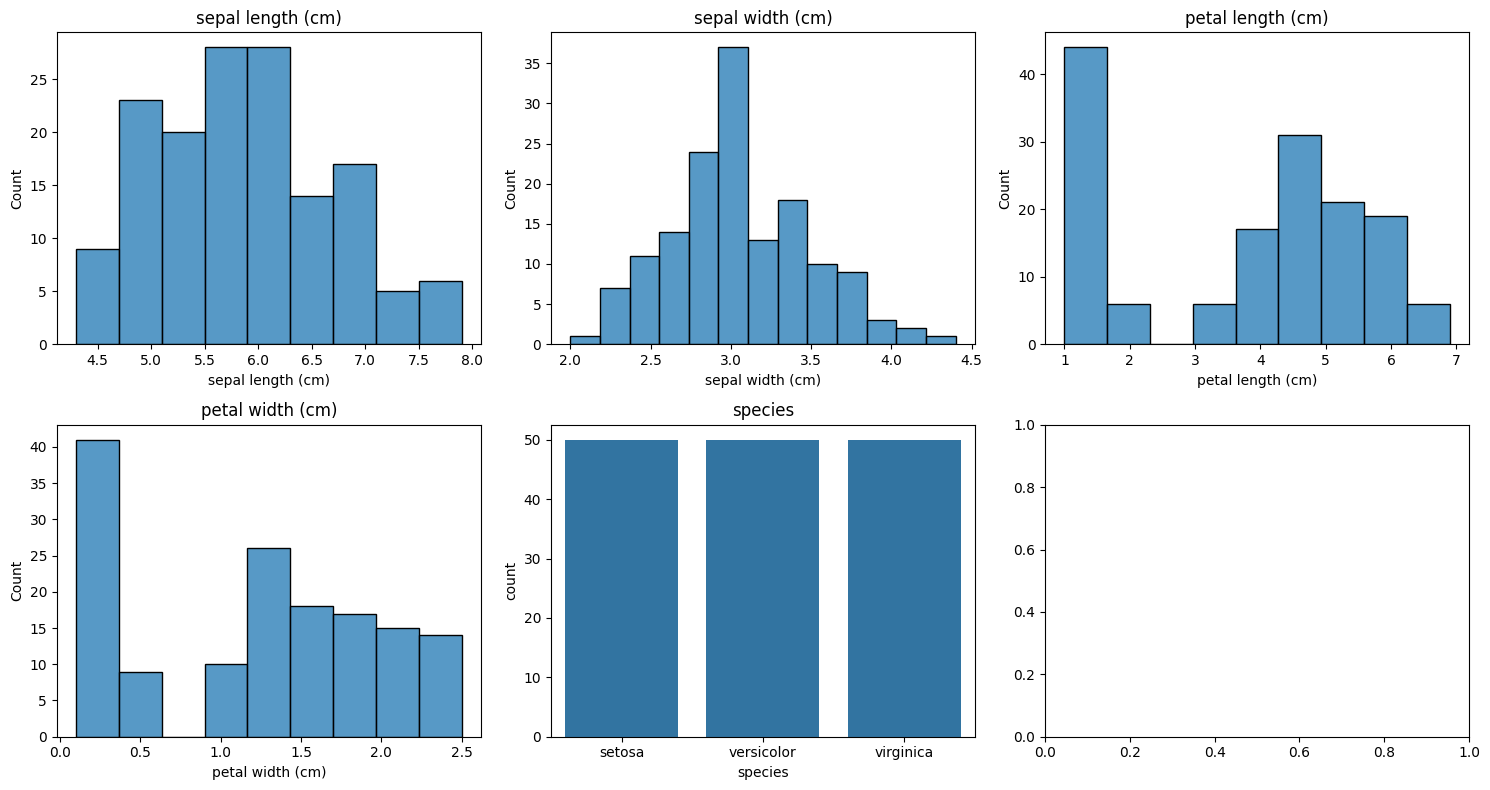

In [7]:
plot_column_distributions(df)